In [2]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
from random import sample

### Load Data

In [3]:
SC_DF = sc.read_h5ad('./DAP3_SC_072821.h5ad')

### Subset Cardiac and adjacent clusters. Recluster using UMAP

In [7]:
sg_pos = []

for cell in SC_DF.obs.index:
    if SC_DF.obs.loc[cell].louvain == '1' or SC_DF.obs.loc[cell].louvain == '2':
        sg_pos.append(cell)

cardiac_cells = SC_DF[sg_pos]

In [8]:
sc.tl.pca(cardiac_cells, random_state= 0)

computing PCA
    with n_comps=50
    finished (0:01:10)


In [9]:
sce.tl.phate(cardiac_cells, k= 30, a= 100, random_state = 0)

computing PHATE


Calculating PHATE...
  Running PHATE on 28334 cells and 35976 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 30.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 93.19 seconds.
    Calculating affinities...
    Calculated affinities in 4.72 seconds.
  Calculated graph and diffusion operator in 129.09 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 11.17 seconds.
    Calculating KMeans...
    Calculated KMeans in 72.16 seconds.
  Calculated landmark operator in 86.02 seconds.
  Calculating optimal t...
  Calculated optimal t in 1.99 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.33 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 17.09 seconds.
Calculated PHATE in 234.56 seconds.


    finished: added
    'X_phate', PHATE coordinates (adata.obsm) (0:03:54)


In [10]:
sc.pp.neighbors(
    cardiac_cells,
    use_rep='X_pca',
    random_state = 0
)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [11]:
sc.tl.louvain(
    cardiac_cells,
    resolution = 0.3,
    random_state = 0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:06)


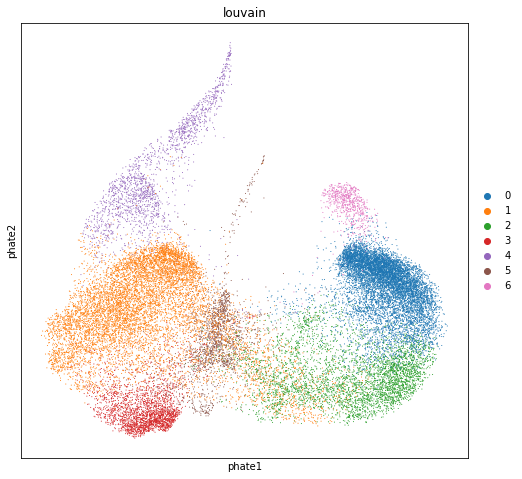

In [12]:
sce.pl.phate(cardiac_cells, color = 'louvain')

In [13]:
sc.tl.rank_genes_groups(cardiac_cells, groupby='louvain', key_added='rank_genes_r1.0')

ranking genes
    finished: added to `.uns['rank_genes_r1.0']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


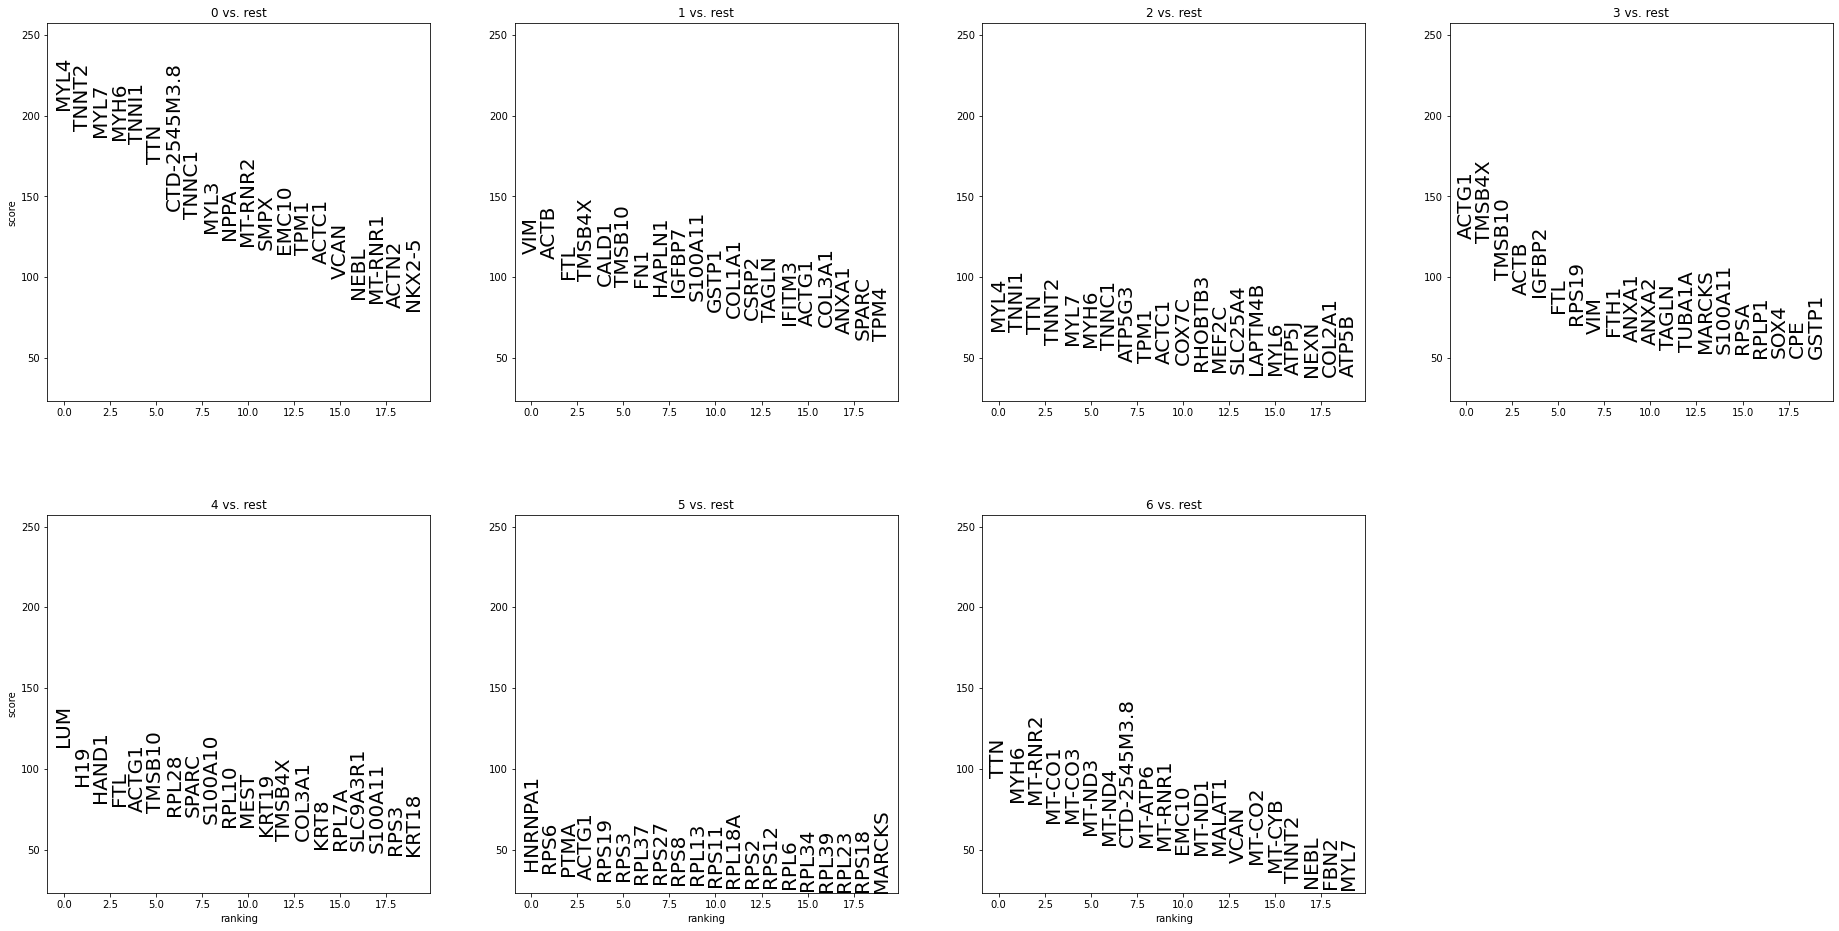

In [14]:
sc.pl.rank_genes_groups(cardiac_cells, key='rank_genes_r1.0',fontsize=20)

In [15]:
cardiac_cells.uns['iroot'] = np.flatnonzero(cardiac_cells.obs['louvain']  == '3')[0]

In [16]:
sc.tl.dpt(cardiac_cells)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99623156 0.9930512  0.9836925  0.97964287 0.9774457
     0.97340167 0.9727314  0.9673133  0.95882833 0.9582559  0.9571455
     0.952937   0.9505193  0.9493543 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:01)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


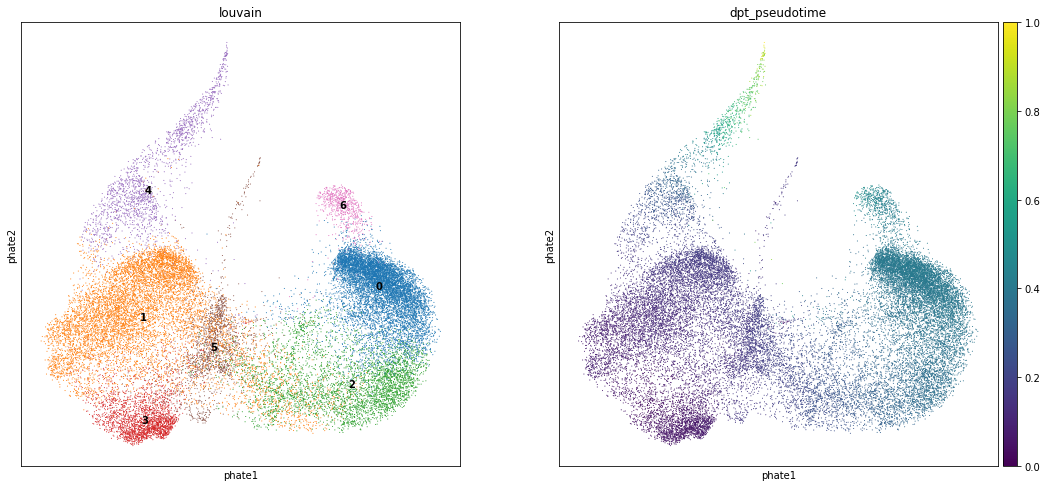

In [17]:
sce.pl.phate(cardiac_cells, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')

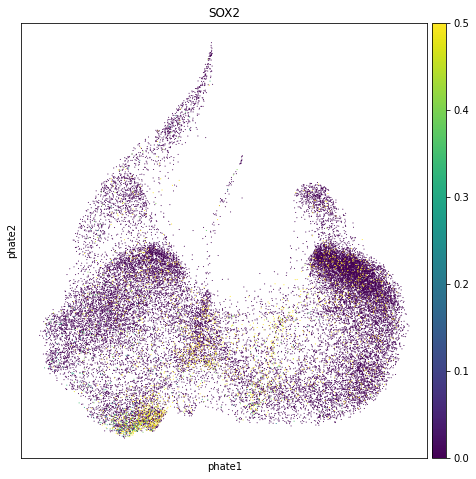

In [18]:
sce.pl.phate(cardiac_cells, color = 'SOX2', vmin=0,vmax=.5)

In [20]:
# Calculate ranks of pseudotime
array = np.array(cardiac_cells.obs['dpt_pseudotime'])

temp = array.argsort()

ranks = np.empty_like(temp)

ranks[temp] = np.arange(len(array))

cardiac_cells.obs['rank_pseudotime'] = ranks

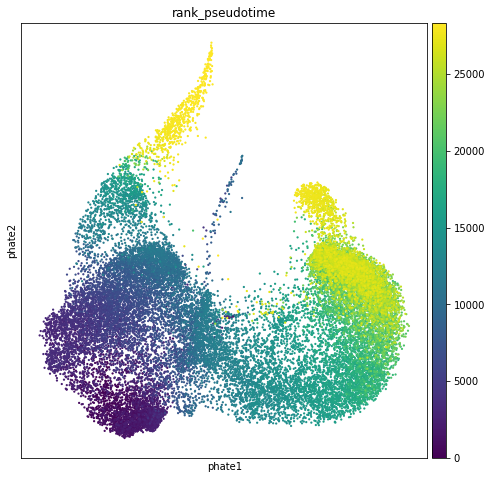

In [21]:
sce.pl.phate(cardiac_cells, color='rank_pseudotime', size=20)

### Subset Cells and Rerun PHATE (Selected for cardiac cells)

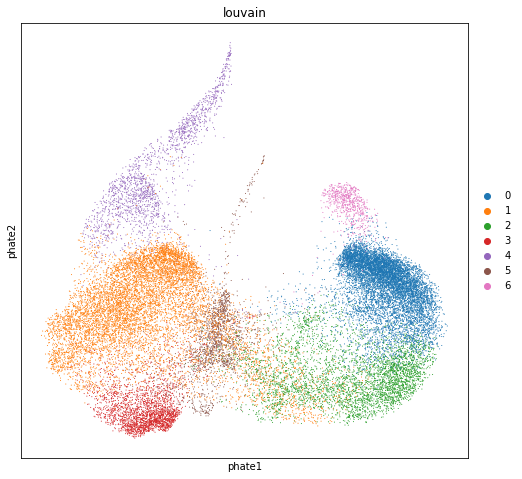

In [12]:
sce.pl.phate(cardiac_cells, color = 'louvain')

In [22]:
sg_pos = []
Interested_Cluster = ['0', '2','3','5', '6']
for cell in cardiac_cells.obs.index:
    if cardiac_cells[cell].obs.louvain.tolist()[0] in Interested_Cluster:
        sg_pos.append(cell)
cardiac_cells_subset = cardiac_cells[sg_pos]

In [23]:
sc.tl.pca(cardiac_cells_subset, random_state= 0)

computing PCA
    with n_comps=50
    finished (0:00:41)


In [24]:
sce.tl.phate(cardiac_cells_subset, k=60, a= 100, random_state = 0)

computing PHATE


Calculating PHATE...
  Running PHATE on 17716 cells and 35976 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 20.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 42.01 seconds.
    Calculating affinities...
    Calculated affinities in 4.24 seconds.
  Calculated graph and diffusion operator in 67.77 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 13.73 seconds.
    Calculating KMeans...
    Calculated KMeans in 58.53 seconds.
  Calculated landmark operator in 75.65 seconds.
  Calculating optimal t...
  Calculated optimal t in 1.86 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.30 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.98 seconds.
Calculated PHATE in 153.61 seconds.


    finished: added
    'X_phate', PHATE coordinates (adata.obsm) (0:02:33)


In [25]:
sc.pp.neighbors(
    cardiac_cells_subset,
    use_rep='X_pca',
    random_state = 0)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


In [26]:
sc.tl.louvain(
    cardiac_cells_subset,
    resolution = 0.3,
    random_state = 0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


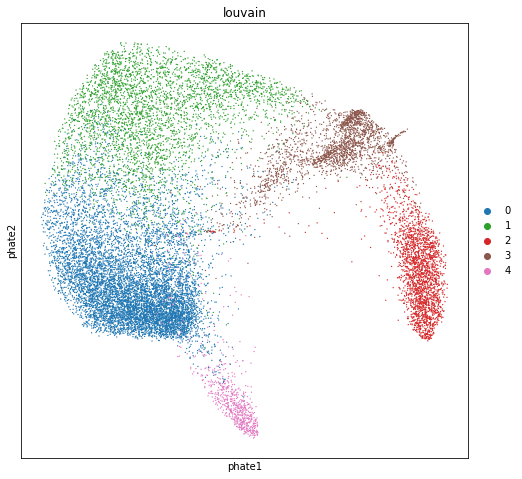

In [27]:
sce.pl.phate(cardiac_cells_subset, color = 'louvain')

In [77]:
sc.tl.rank_genes_groups(cardiac_cells_subset, groupby='louvain', key_added='rank_genes_r1.0')

ranking genes
    finished: added to `.uns['rank_genes_r1.0']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


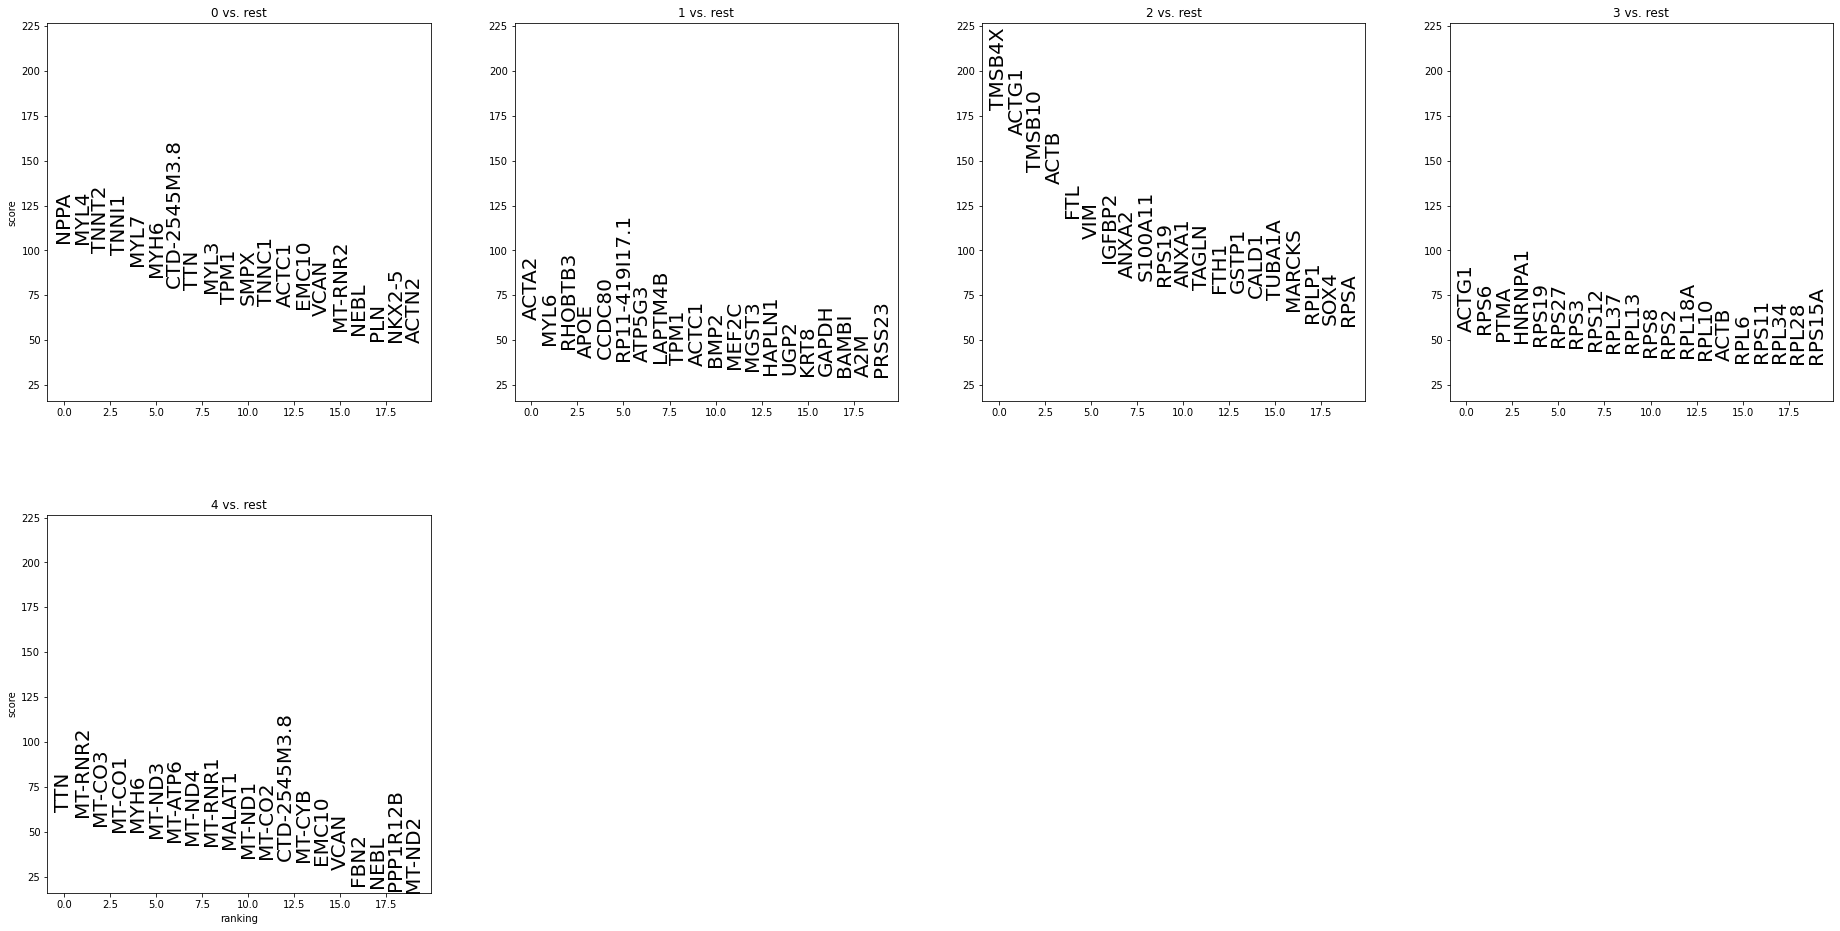

In [78]:
sc.pl.rank_genes_groups(cardiac_cells_subset, key='rank_genes_r1.0',fontsize=20)

In [79]:
cardiac_cells_subset.uns['iroot'] = np.flatnonzero(cardiac_cells_subset.obs['louvain']  == '2')[0]

In [80]:
sc.tl.dpt(cardiac_cells_subset)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


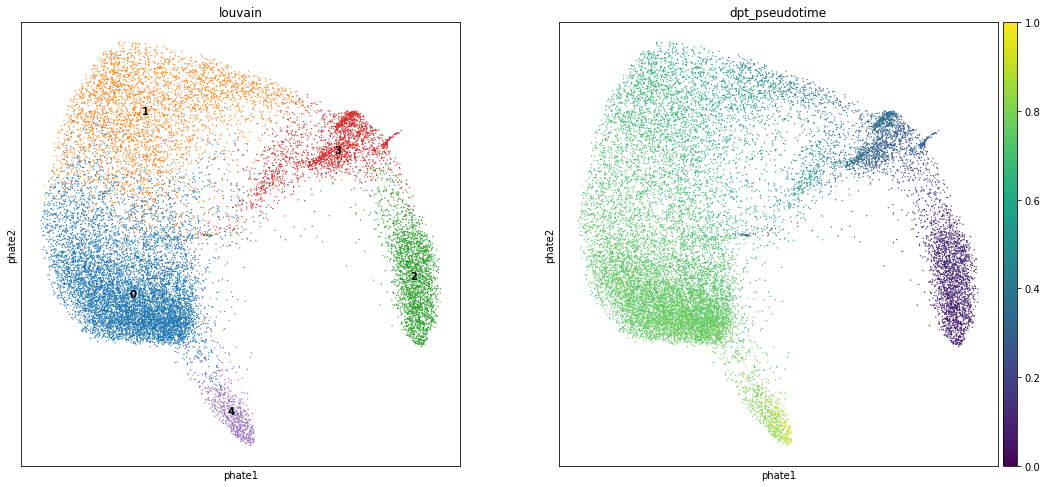

In [81]:
sce.pl.phate(cardiac_cells_subset, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')

In [85]:
cardiac_cells_subset

AnnData object with n_obs × n_vars = 17716 × 35976
    obs: 'n_counts_all', 'library_name', 'louvain', 'dpt_pseudotime', 'rank_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap', 'rank_genes_r1.0', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_phate', 'X_diffmap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [82]:
# Calculate ranks of pseudotime
array = np.array(cardiac_cells_subset.obs['dpt_pseudotime'])

temp = array.argsort()

ranks = np.empty_like(temp)

ranks[temp] = np.arange(len(array))

cardiac_cells_subset.obs['rank_pseudotime'] = ranks

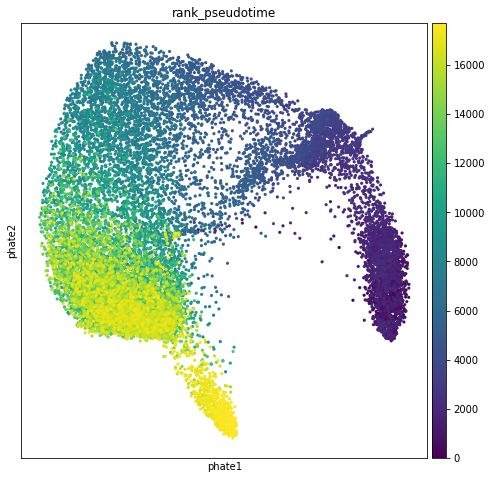

In [83]:
sce.pl.phate(cardiac_cells_subset, color='rank_pseudotime', size=40 )

In [86]:
cardiac_cells_subset.write('./DAP3_SC_CM_Pseudo_PHATE_080321.h5ad')

### Merge MT

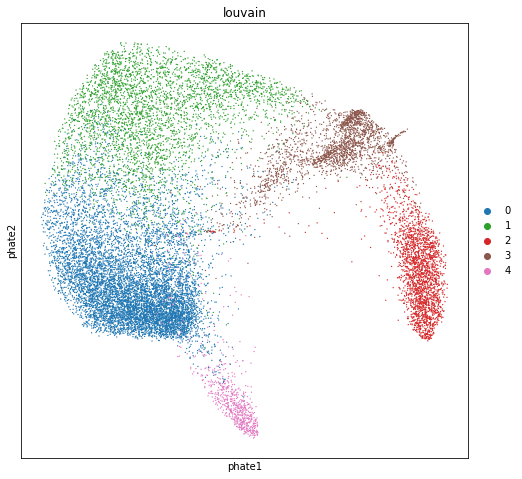

In [28]:
sce.pl.phate(cardiac_cells_subset, color = 'louvain')

In [37]:
new_louvain = []
for cell in cardiac_cells_subset.obs.index:
    if cardiac_cells_subset[cell].obs.louvain[0] == '4':
        new_louvain.append('0')
    else:
        new_louvain.append(cardiac_cells_subset[cell].obs.louvain[0])

In [38]:
cardiac_cells_subset.obs['louvain'] = new_louvain

... storing 'louvain' as categorical


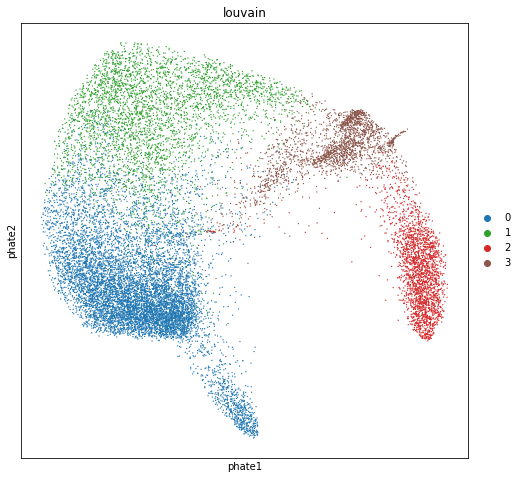

In [39]:
sce.pl.phate(cardiac_cells_subset, color = 'louvain')

In [40]:
sc.tl.rank_genes_groups(cardiac_cells_subset, groupby='louvain', key_added='rank_genes_r1.0')

ranking genes
    finished: added to `.uns['rank_genes_r1.0']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


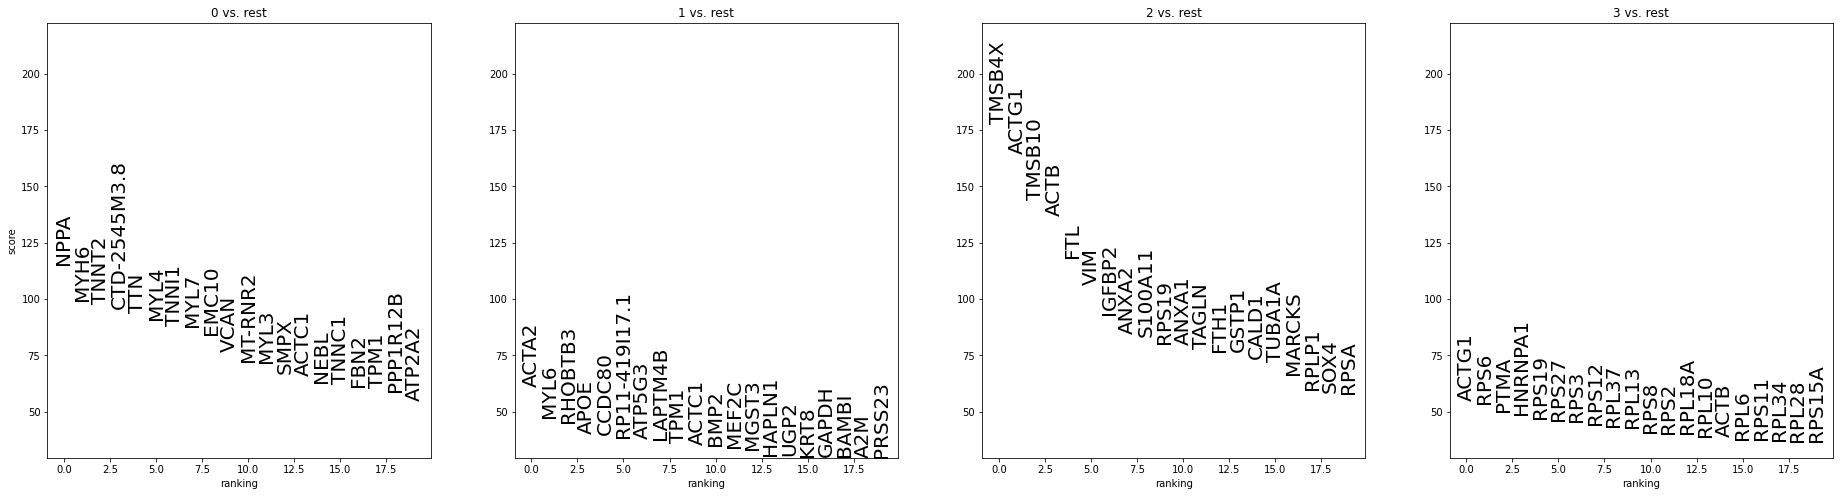

In [41]:
sc.pl.rank_genes_groups(cardiac_cells_subset, key='rank_genes_r1.0',fontsize=20)

In [42]:
cardiac_cells_subset.uns['iroot'] = np.flatnonzero(cardiac_cells_subset.obs['louvain']  == '2')[0]

In [43]:
sc.tl.dpt(cardiac_cells_subset)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


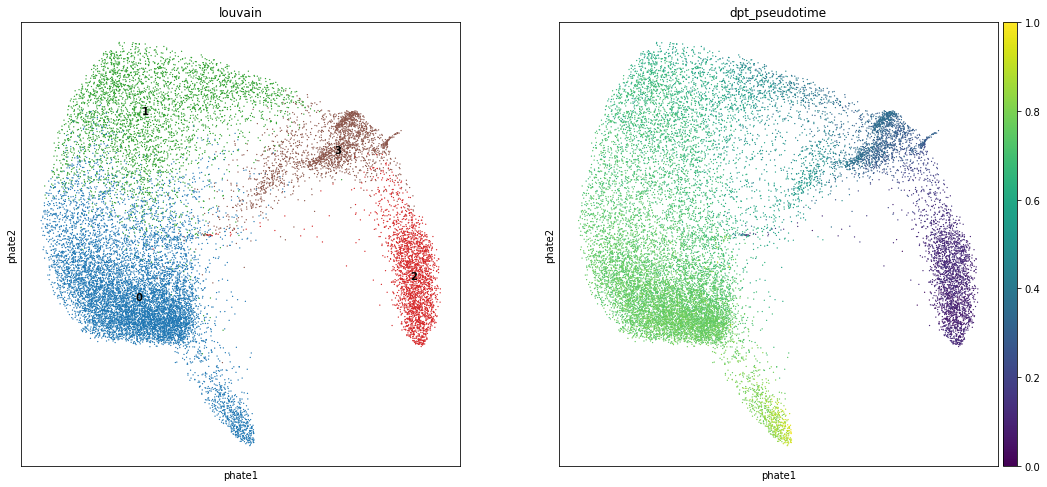

In [44]:
sce.pl.phate(cardiac_cells_subset, color=['louvain', 'dpt_pseudotime'], legend_loc='on data')

In [45]:
# Calculate ranks of pseudotime
array = np.array(cardiac_cells_subset.obs['dpt_pseudotime'])

temp = array.argsort()

ranks = np.empty_like(temp)

ranks[temp] = np.arange(len(array))

cardiac_cells_subset.obs['rank_pseudotime'] = ranks

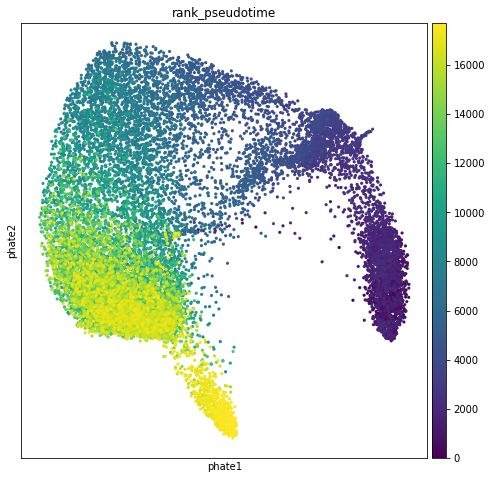

In [46]:
sce.pl.phate(cardiac_cells_subset, color='rank_pseudotime', size=40)

In [ ]:
cardiac_cells_subset.write('./DAP3_SC_CM_Pseudo_PHATE_Man_080521.h5ad')